# 在线使用YOLOv3，绝对不需要自行配置环境Colab已经完全配置好了
帮助自己在云端迅速训练属于自己的YOLOv3模型，并进行检测

# 第一步：开启GPU加速
Colab默认是没开启GPU加速的，我们点击【修改】【笔记本设置】【硬件加速】【GPU】

现在好了，GPU加速已经开启了

# 第二步：加载DarkNet
加载网络
开启GPU和OPENCV


In [0]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 12955 (delta 42), reused 52 (delta 29), pack-reused 12886
Receiving objects: 100% (12955/12955), 11.84 MiB | 16.27 MiB/s, done.
Resolving deltas: 100% (8828/8828), done.


In [0]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [0]:
# 看下CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [0]:
# 编译DarkNet
!make

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variabl

# 第三步：加载预训练的权重
YOLOv3 在COCO数据集上已经训练的很好了，我们不需要花大力气去训练，加载预训练的权重能够帮助我们更快的训练模型。

In [0]:
# 下载预训练的权重
!wget https://pjreddie.com/media/files/yolov3.weights

In [0]:
# 显示
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# 上传文件
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# 下载文件 
def download(path):
  from google.colab import files
  files.download(path)

# 第四步: Detect起来！

现在其实就有一个好的YOLOv3了，你可以很好的使用这个构建好的网络去检测COCO数据集里面的类别，不知道COCO数据集？不要担心，已经为你准备好了！[COCO数据集](http://cocodataset.org/#explore)

用下面的命令进行检测
```bash
!./darknet detect <path to config> <path to weights> <path to image>
```
Darknet 自带了一些示例图片

**注意:** 检测完成，我们需要显示一下
```bash
imShow('predictions.jpg')
```
OK了，可以显示出来

/content/darknet
 CUDA-version: 10000 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 610, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF


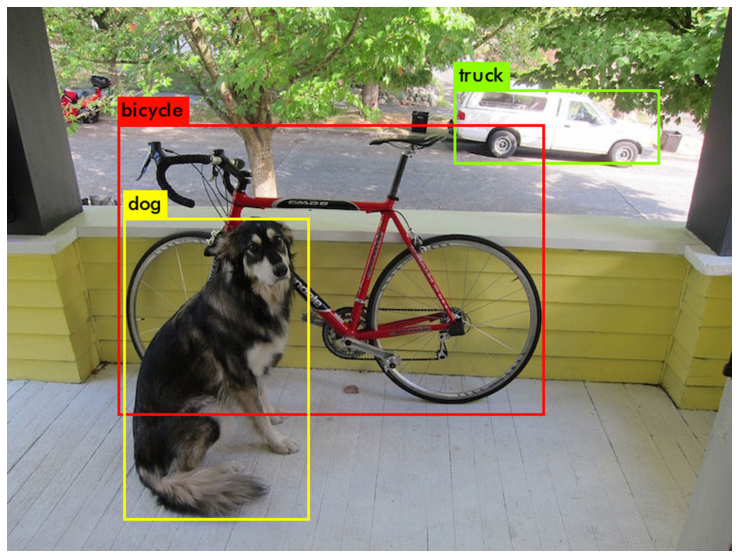

In [0]:
# 检测试一下
%cd /content/darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg
# 上述函数写好了，显示一下
imShow('predictions.jpg')

怎么样，是不是没骗你！是不是可以加载出来！这狗儿是不是很可爱！如果你喜欢！请看我的下列视频！点开就会发现！这个更可爱！（检测的人这么多，我怕狗儿害羞(✿◡‿◡)）
[JUST CLICK HERE! CLICK HERE!! CLICK HERE!!!](https://www.bilibili.com/video/BV1t741127H7/)

In [0]:
# 到这里抛出错误，阻断程序运行
assert False

AssertionError: ignored

# 第五步: 试一下自己的图片吧
刚才第四步都是示例图片，你肯定怀疑UP骗你，只是用来一个显示功能！
来吧，咱试一下自己的图片！

### 本地文件
下面写好了upload()函数，可以运行上传文件。

当然咱也可以点击左边功能框的  **【上传】**  选择图片上传到服务器

但是注意，上传的文件默认在根目录，不再上述Data目录

我们得这样搞
```
!./darknet detect cfg/yolov3.cfg yolov3.weights ../<your image name>
```

In [0]:
# 上传文件
%cd ..
upload()

/content


Saving amazine.jpg to amazine.jpg
saved file amazine.jpg


/content/darknet
 CUDA-version: 10000 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 610, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF


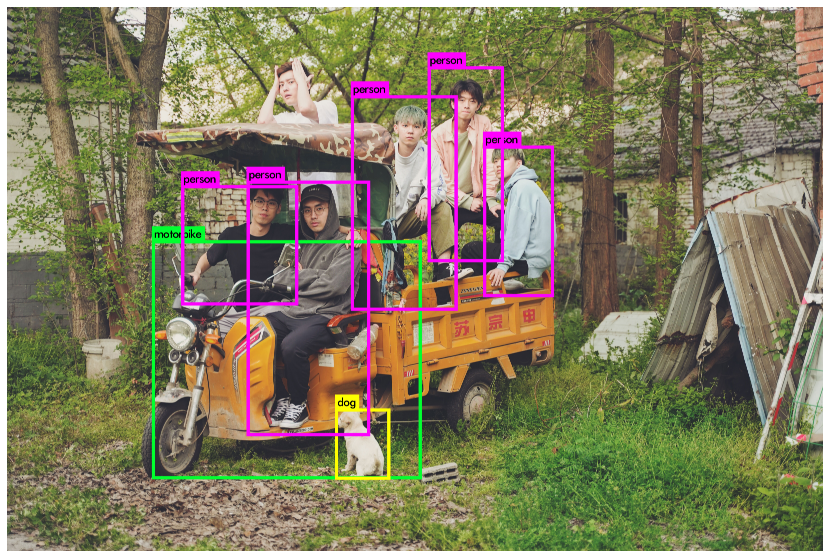

In [0]:
# 注意工作路径
%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights ../amazine.jpg
imShow('predictions.jpg')

### Google Drive
链接Drive，使用以下命令

就OK了

```
!./darknet detect cfg/yolov3.cfg yolov3.weights /mydrive/<path to image>
```
建议在DRIVE里面搞一个 'images'文件夹

In [0]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# 这其实就是一个连接
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'Colab Notebooks'
 darknet
'Few-Shot Object Detection with Attention-RPN and Multi-Relation Detector'
 images
 yolov3
 yolov3.weights
 新建文本文档.txt


[Errno 20] Not a directory: 'darknet'
/content/darknet
 CUDA-version: 10000 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 610, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn =

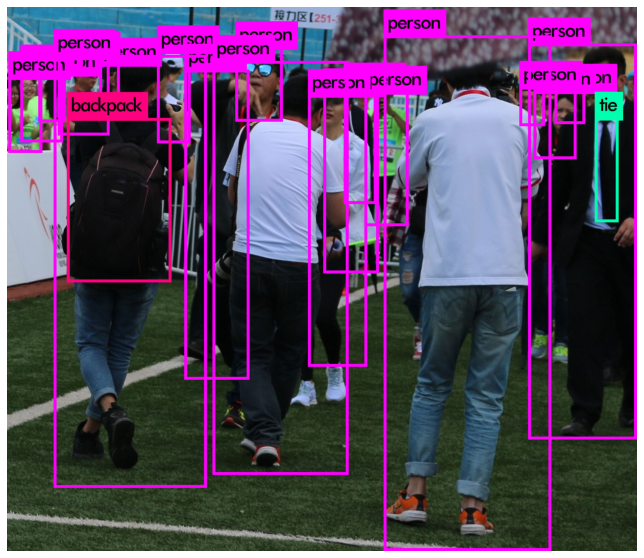

In [0]:
# 检测一下，记得更改图片名称
%cd darknet
! ./darknet detect cfg/yolov3.cfg yolov3.weights /mydrive/images/521.jpg
imShow('predictions.jpg')

### 下载一下文件吧

#### 下载到本地

'download()' 函数

#### 下载到GOOGLE DRIVE
必须保证已经连接上DRIVE了，直接复制就行

```
!cp <file to download> <destination to save file>
```

In [0]:
# 本地
download('predictions.jpg')

In [0]:
# GOOGLE DRIVE
!cp predictions.jpg /mydrive/det.jpg

In [0]:
# 报错了？再来一遍试试！
download('predictions.jpg')